In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from collections import Counter

In [23]:
filePath = os.getcwd() + '/Data/annotations/cleaned_ingredients.txt'
ingredients = []
tot = 0
nonveg = 0

In [24]:
nonVegIngredients = ['chicken', 'beef', 'duck', 'poultry', 'snapper', 'green-tail shrimps', 'cuttlefish', 'scallop', 'calamari', 'prime rib', 'salami', 'shell-on shrimp', 'seafood', 'tuna fillets', 'escargot', 'deveined shrimp', 'filet mignon', 'lobster', 'tuna', 'foie gras', 'snail shells', 'venison', 'salmon', 'short rib', 'prawn', 'tentacles', 'baby calamari', 'liver', 'snails', 'shrimp uncook', 'jumbo shrimp', 'bacon', 'rib roast', 'uncook shrimp', 'shrimp', 'tuna water', 'buffalo', 'clam', 'eel', 'wagyu rib eye', 'shrimp heads', 'oyster', 'baby back ribs', 'roast turkey', 'jumbo shells', 'turkey', 'rib', 'helix snails', 'pig', 'steak', 'caviar', 'back ribs', 'shell', 'sea bream', 'veal', 'meat', 'pork', 'lamb', 'squid', 'frankfurter', 'mussels', 'shrimp scampi', 'top loin']
len(nonVegIngredients)

63

In [25]:
with open(filePath) as dataset:
    line = dataset.readline().strip()
    
    while line:
        recipe = line.split(',') 
        
        for i in recipe:
            if i in nonVegIngredients:
                nonveg += 1
                break
        
        ingredients.extend(recipe)
        tot += 1
        
        line = dataset.readline().strip()
        
count = dict(Counter(ingredients))

In [26]:
nonveg  # total no. of non veg recipes

1927

In [19]:
df = pd.DataFrame.from_dict(count, orient = 'index', columns = ['count'])
top20Ingred = df.sort_values(by = 'count', ascending = False).iloc[: 20]  # top 20

In [20]:
top20Ingred = top20Ingred.sort_values(by = 'count')  # reverse the order for the graph

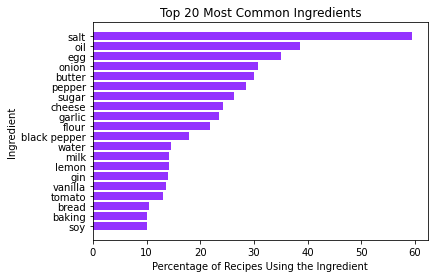

In [21]:
plt.barh(top20Ingred.index, (top20Ingred['count'] / tot) * 100, color = '#9433ff')
plt.title('Top 20 Most Common Ingredients')
plt.xlabel('Percentage of Recipes Using the Ingredient')
plt.ylabel('Ingredient')
plt.show()
plt.close()

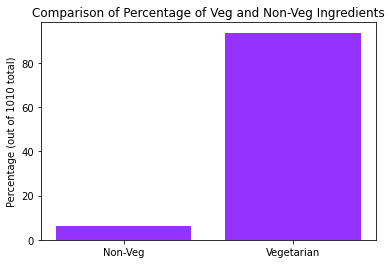

In [22]:
ingredientsDistro = [len(nonVegIngredients) / 1010 * 100, (1010 - len(nonVegIngredients)) / 1010 * 100]
ingredientGraphLabels = ['Non-Veg', 'Vegetarian']
plt.bar(ingredientGraphLabels, ingredientsDistro, color = '#9433ff')
plt.title('Comparison of Percentage of Veg and Non-Veg Ingredients')
plt.ylabel('Percentage (out of 1010 total)')
plt.show()
plt.close()

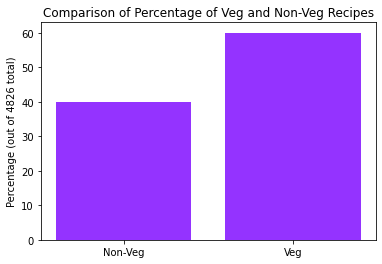

In [29]:
recipeDistro = [nonveg / tot * 100, (tot - nonveg) / tot * 100]
recipeLabels = ['Non-Veg', 'Veg']
plt.bar(recipeLabels, recipeDistro, color = '#9433ff')
plt.title('Comparison of Percentage of Veg and Non-Veg Recipes')
plt.ylabel('Percentage (out of 4826 total)')
plt.show()
plt.close()

In [30]:
# still figuring this bit out

recipes = {
    'onion': [],
    'lime': [],
    'salt': [],
    'oil': [],
    'egg': [],
    'tomato': [],
    'beans': []
}

with open(os.getcwd() + '/testFile.txt') as dataset:
    line = dataset.readline().strip()

    while line:
        ingredients = line.split(',')

        for i in ingredients:
            x = [j for j in ingredients if i != j]
            recipes[i].extend(x)

        line = dataset.readline().strip()

for i in recipes:
    recipes[i] = set(recipes[i])
    
recipes

{'onion': {'egg', 'lime', 'oil', 'salt', 'tomato'},
 'lime': {'oil', 'onion', 'salt'},
 'salt': {'egg', 'lime', 'oil', 'onion', 'tomato'},
 'oil': {'beans', 'egg', 'lime', 'onion', 'salt', 'tomato'},
 'egg': {'oil', 'onion', 'salt', 'tomato'},
 'tomato': {'beans', 'egg', 'oil', 'onion', 'salt'},
 'beans': {'oil', 'tomato'}}

In [31]:
import networkx as nx

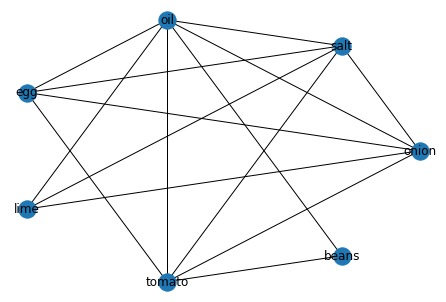

In [34]:
g = nx.Graph()

for i in recipes:
    for j in recipes[i]:
        g.add_edge(i, j)
        
nx.draw(g, with_labels = True)
# plt.savefig(dir)
# plt.clf